In [1]:
!git clone https://github.com/michaelo-ponteski/isaid-instance-segmentation.git
%cd isaid-instance-segmentation/

Cloning into 'isaid-instance-segmentation'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 41 (delta 12), reused 34 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (41/41), 14.17 KiB | 2.83 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/isaid-instance-segmentation


In [2]:
!pwd

/content/isaid-instance-segmentation


In [3]:
# The following code will only execute
# successfully when compression is complete

import kagglehub

# Download latest version
path = kagglehub.dataset_download("michaeloponteski/isaid-patches")

print("Path to dataset files:", path)

100%|██████████| 41.1G/41.1G [31:28<00:00, 23.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/michaeloponteski/isaid-patches/versions/1


In [4]:
import torch
import torchvision
import matplotlib.pyplot as plt
import importlib

In [60]:
import datasets.isaid_dataset
import models.maskrcnn_model
import utils.overfit_test

importlib.reload(utils.overfit_test)
importlib.reload(datasets.isaid_dataset)
importlib.reload(models.maskrcnn_model)

from datasets.isaid_dataset import iSAIDDataset, visualize_sample
from models.maskrcnn_model import get_maskrcnn_model, MaskRCNNTrainer
from utils.overfit_test import overfit_single_image_test

In [6]:
root_dir = '/root/.cache/kagglehub/datasets/michaeloponteski/isaid-patches/versions/1/iSAID_patches'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 16

# Load dataset
train_dataset = iSAIDDataset(root_dir, split='train')
val_dataset = iSAIDDataset(root_dir, split='val')

print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")

Train: 28029, Val: 9512


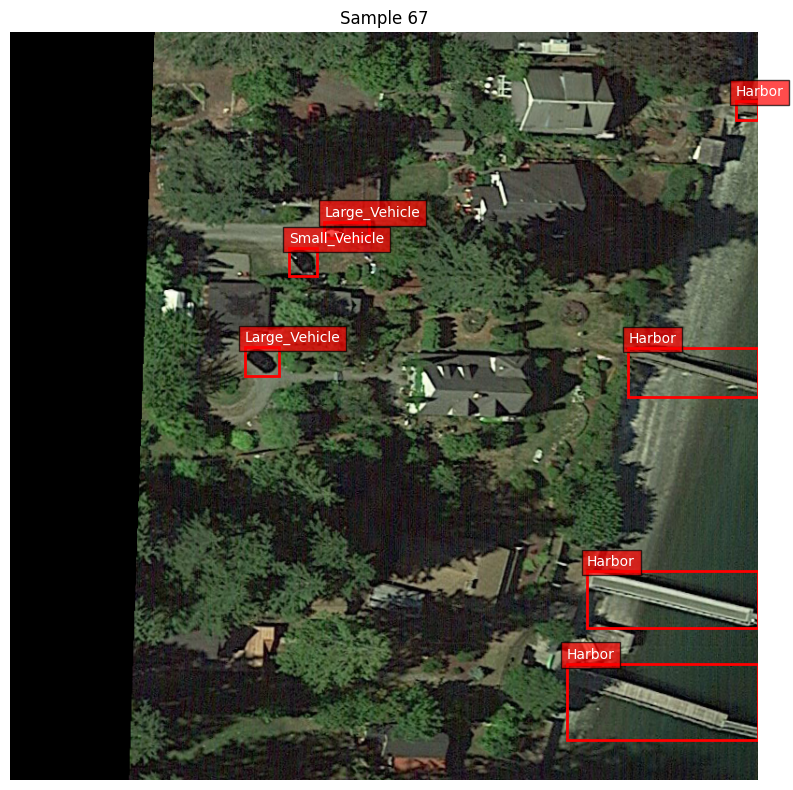

In [53]:
visualize_sample(train_dataset, 19)

In [57]:
model = get_maskrcnn_model(num_classes, pretrained=True)

OVERFIT SINGLE IMAGE TEST

Image shape: torch.Size([3, 800, 800])
Number of instances: 26
Classes: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 14, 14]

Training for 200 epochs...
Epoch [10/200], Loss: 2.5045
  loss_classifier: 0.7869
  loss_box_reg: 0.7673
  loss_mask: 0.6278
  loss_objectness: 0.1036
  loss_rpn_box_reg: 0.2189
Epoch [20/200], Loss: 2.0512
  loss_classifier: 0.5067
  loss_box_reg: 0.7921
  loss_mask: 0.5850
  loss_objectness: 0.0302
  loss_rpn_box_reg: 0.1373
Epoch [30/200], Loss: 1.4046
  loss_classifier: 0.2608
  loss_box_reg: 0.5896
  loss_mask: 0.4641
  loss_objectness: 0.0044
  loss_rpn_box_reg: 0.0858
Epoch [40/200], Loss: 1.0093
  loss_classifier: 0.1876
  loss_box_reg: 0.3994
  loss_mask: 0.3512
  loss_objectness: 0.0019
  loss_rpn_box_reg: 0.0692
Epoch [50/200], Loss: 0.8809
  loss_classifier: 0.1497
  loss_box_reg: 0.3702
  loss_mask: 0.3088
  loss_objectness: 0.0039
  loss_rpn_box_reg: 0.0483
Epoch [60/200], Loss: 0.6556
  loss_c

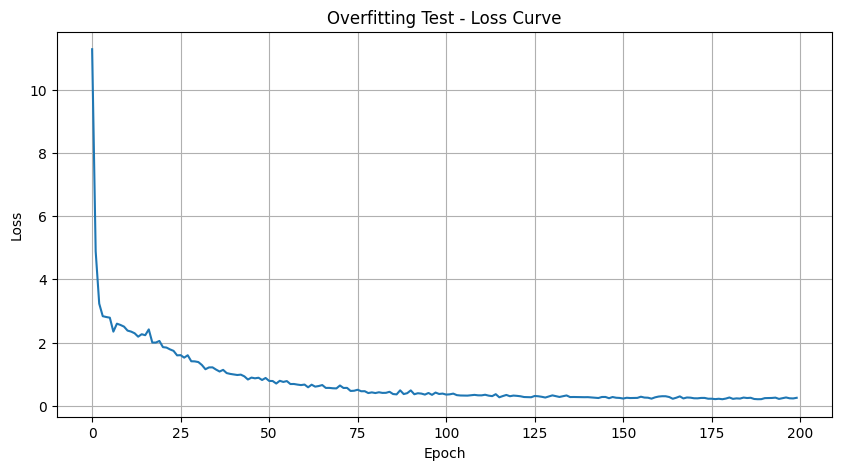

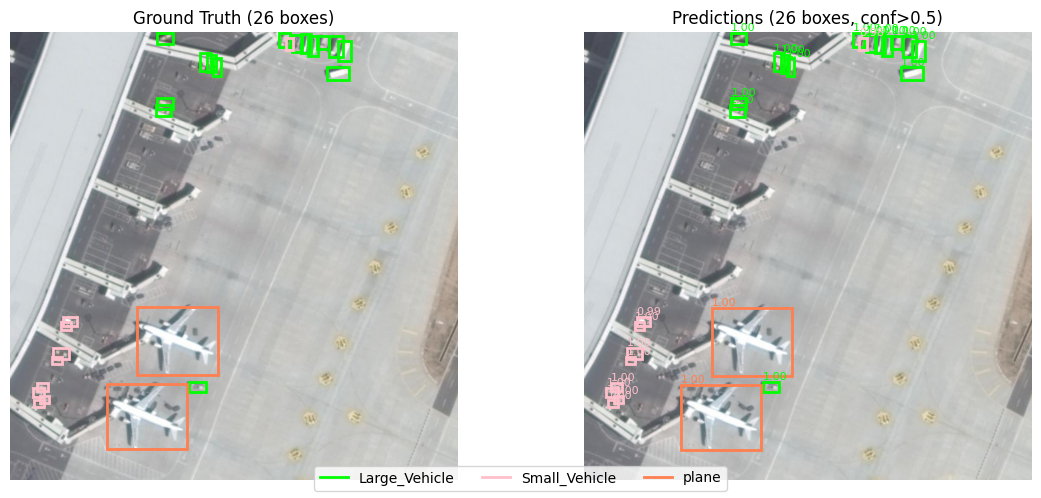


Found 26 boxes (should be 26)

RESULTS:
Initial Loss: 11.2742
Final Loss: 0.2534
Improvement: 97.8%


In [58]:
losses, preds = overfit_single_image_test(
    model,
    train_dataset,
    idx=19,
    num_epochs=200,
    device=device
)